In [17]:
from collections import defaultdict
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
# vscode has a bug with tqdm.notebook
# https://github.com/microsoft/vscode-jupyter/issues/9397
from tqdm import tqdm
from pymatgen.io.vasp.outputs import Vasprun

In [38]:
# Mount with ratarmount
materials = ("MoS2", "WSe2")

In [ ]:
def load_band_gaps(folder: Path):
    data = defaultdict(dict)
    for vasp_folder in tqdm(folder.glob(r"poscar_*")):
        vasprun_file = Vasprun(vasp_folder / "01_relax" / "vasprun.xml",
                            parse_potcar_file=False,
                            separate_spins=False,
                            parse_dos=True)
        data[vasp_folder.name]['eigenvalue_band_properties'], _, _, _ = \
            vasprun_file.eigenvalue_band_properties
        data[vasp_folder.name]['get_band_structure'] = \
            vasprun_file.get_band_structure().get_band_gap()['energy']
        return data

In [34]:
for material in materials:
    folder = Path(f"../datasets/raw_vasp/dichalcogenides8x8_vasp_nus_202110/{material}_8x8_5933")
    

11it [00:03,  3.14it/s]


KeyboardInterrupt: 

In [35]:
data

defaultdict(dict,
            {'poscar_S1-6141cf15c819ca30b196b473': {'eigenvalue_band_properties': 1.8335,
              'get_band_structure': 1.8335},
             'poscar_S2-6141cf16a05be5973bd77a67': {'eigenvalue_band_properties': 1.2981,
              'get_band_structure': 1.2981},
             'poscar_S2-6141cf16a05be5973bd77a69': {'eigenvalue_band_properties': 1.2943,
              'get_band_structure': 1.2943},
             'poscar_S2-6141cf17a05be5973bd77a6b': {'eigenvalue_band_properties': 1.2985,
              'get_band_structure': 1.2985},
             'poscar_S2-6141cf18a05be5973bd77a6d': {'eigenvalue_band_properties': 1.3029,
              'get_band_structure': 1.3029},
             'poscar_S2-6141cf19a05be5973bd77a6f': {'eigenvalue_band_properties': 1.2981,
              'get_band_structure': 1.2981},
             'poscar_S2-6141cf19a05be5973bd77a71': {'eigenvalue_band_properties': 1.3017,
              'get_band_structure': 1.3017},
             'poscar_S2-6141cf1ba05be

In [36]:
data_pd = pd.DataFrame.from_dict(data, orient='index')

In [37]:
data_pd.head()

,eigenvalue_band_properties,get_band_structure
poscar_S1-6141cf15c819ca30b196b473,1.8335,1.8335
poscar_S2-6141cf16a05be5973bd77a67,1.2981,1.2981
poscar_S2-6141cf16a05be5973bd77a69,1.2943,1.2943
poscar_S2-6141cf17a05be5973bd77a6b,1.2985,1.2985
poscar_S2-6141cf18a05be5973bd77a6d,1.3029,1.3029


In [21]:
differences = data_pd['get_band_structure'] - data_pd['eigenvalue_band_properties'] 

,eigenvalue_band_properties,get_band_structure
poscar_S1-6141cf15c819ca30b196b473,1.8335,1.8335


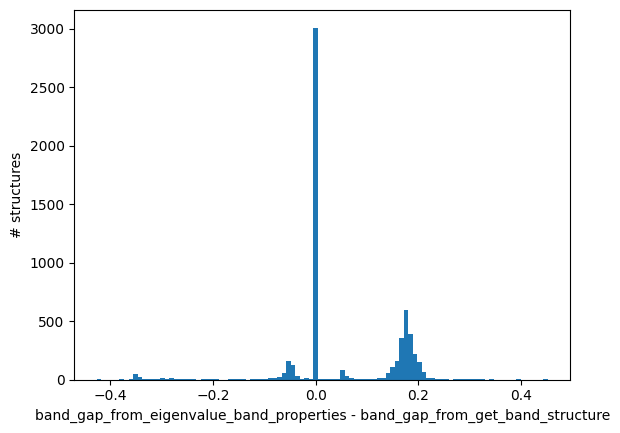

In [5]:
fig, ax = plt.subplots()
ax.hist(differences, bins=100);
ax.set_xlabel("band_gap_from_get_band_structure - band_gap_from_eigenvalue_band_properties")
ax.set_ylabel("# structures");